Nama : Aliif Arief Maulana

Kelas : belajar machine learning pemula

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-26 08:05:23--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.43MB/s    in 18s     

2021-07-26 08:05:41 (17.1 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os,shutil
#ekstraksi dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [ ]:
#splitting dataset
from sklearn.model_selection import train_test_split

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
#buat direktori data train dan validatiom
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
#buat data train
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
#buat data validasi
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
#buat direktori train dan validation dari setiap rock, paper, scissors
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [ ]:
#splitting direktori jadi data train and validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40) #agar perbandingan 60:40
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40) #agar perbandingan 60:40
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40) #agar perbandingan 60:40

In [ ]:
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40) #agar perbandingan 60:40

In [ ]:
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40) #agar perbandingan 60:40

In [ ]:
#satukan file data train dan atur tree direktori agar sesuai
for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
#satukan file data train dan atur tree direktori agar sesuai
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(val_scissors, file))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

#membuat sebuah objek ImageDataGenerator untuk data training dan data testing
train_datagen = ImageDataGenerator(
                     rescale=1./255,
                     rotation_range=20,
                     horizontal_flip=True,
                     shear_range = 0.2,
                     fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
                     rescale=1./255,
                     rotation_range=20,
                     horizontal_flip=True,
                     shear_range = 0.2,
                     fill_mode = 'nearest'
)
#menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data train
    target_size = (150, 150),
    batch_size=32,
    class_mode='categorical' #caategorical karena alsifikasi lebih dari 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#implementasi Sequential model pada augmentasi gambar
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax') #pake softmax karena lebih dari 2 class
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
#pake callback untuk stop training setelah akurasi diatas 97% biar gak boros wakt
class stopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi di atas 97%, stop")
      self.model.stop_training = True

callbacks = stopCallback()

#latih model dengan fungsi fit
model.fit(
    train_generator,
    steps_per_epoch=41,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan eposchs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/20
41/41 - 71s - loss: 1.6895 - accuracy: 0.4573 - val_loss: 0.8367 - val_accuracy: 0.7437
Epoch 2/20
41/41 - 70s - loss: 0.6390 - accuracy: 0.7416 - val_loss: 0.4860 - val_accuracy: 0.8062
Epoch 3/20
41/41 - 69s - loss: 0.4156 - accuracy: 0.8438 - val_loss: 0.2085 - val_accuracy: 0.9375
Epoch 4/20
41/41 - 69s - loss: 0.2782 - accuracy: 0.9040 - val_loss: 0.2267 - val_accuracy: 0.9312
Epoch 5/20
41/41 - 71s - loss: 0.2417 - accuracy: 0.9162 - val_loss: 0.2948 - val_accuracy: 0.8875
Epoch 6/20
41/41 - 69s - loss: 0.2306 - accuracy: 0.9253 - val_loss: 0.3119 - val_accuracy: 0.8875
Epoch 7/20
41/41 - 69s - loss: 0.2124 - accuracy: 0.9268 - val_loss: 0.1161 - val_accuracy: 0.9625
Epoch 8/20
41/41 - 69s - loss: 0.1835 - accuracy: 0.9375 - val_loss: 0.2166 - val_accuracy: 0.9187
Epoch 9/20
41/41 - 69s - loss: 0.1514 - accuracy: 0.9390 - val_loss: 0.1130 - val_accuracy: 0.9625
Epoch 10/20
41/41 - 69s - loss: 0.1598 - accuracy: 0.9436 - val_loss: 0.1246 - val_accuracy: 0.9312
Epoch 11/

Saving Image Classifier.png to Image Classifier.png
Image Classifier.png
scissors


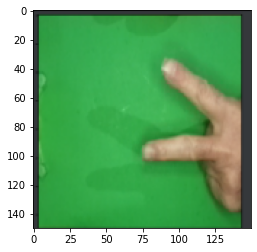

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #prediksi gambar
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')